In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive")



Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv
import random

In [3]:
# Load the web-Stanford dataset
path = "/content/drive/My Drive/web-Stanford.txt"


In [4]:
# Read the data from the file and create a list of edges
res = []
with open(path) as f:
  data = f.readlines()
for l in data:
  if l:
    words = l.split()
    res.append(words)


In [5]:
# Select a sample of 1000 edges
sample = random.sample(res, 1000)
filename = open('data1.txt', 'a')
for item in sample:
  filename.write(item[0] + " " + item[1] + "\n")


In [6]:
# Create the sample and complete graphs
G1 = nx.read_edgelist('data1.txt', nodetype=int, create_using=nx.DiGraph())
G2 = nx.read_edgelist(path, nodetype=int, create_using=nx.DiGraph())


In [7]:
print(f'G1 is the sample graph of web-Stanford')
print(G1)
print(f'G2 is the total web-Stanford graph')
print(G2)


G1 is the sample graph of web-Stanford
DiGraph with 1120 nodes and 618 edges
G2 is the total web-Stanford graph
DiGraph with 281903 nodes and 2312497 edges


In [8]:
# Complete Description of the data set
print("Network Description:")
print("The network is a directed graph representing the web-Stanford dataset, where nodes represent web pages and edges represent hyperlinks between them.")


Network Description:
The network is a directed graph representing the web-Stanford dataset, where nodes represent web pages and edges represent hyperlinks between them.


In [9]:
path_konect = '/content/drive/My Drive/out.txt'

In [10]:
# Read the data from the file and create a list of edges
res2=[]
with open(path_konect) as f:
  data = f.readlines()
for l in data:
  if l:
    words = l.split()
    res2.append(words)

In [11]:
sample_konect = random.sample(res, 1000)
filename = open('data2.txt', 'a')
for item in sample_konect:
  filename.write(item[0] + " " + item[1] + "\n")


In [12]:
G3 = nx.read_edgelist('data2.txt', nodetype=int, create_using=nx.DiGraph())
G4 = nx.read_edgelist(path_konect, nodetype=int, create_using=nx.DiGraph())

In [13]:
print(f'G3 is the sample graph of out')
print(G3)
print(f'G4 is the total out graph')
print(G4)

G3 is the sample graph of out
DiGraph with 1121 nodes and 618 edges
G4 is the total out graph
DiGraph with 1226 nodes and 2615 edges


In [14]:
# Complete Description of the data set
print("Network Description:")
print("The network is a directed graph representing the out dataset, where nodes represent web pages and edges represent hyperlinks between them.")


Network Description:
The network is a directed graph representing the out dataset, where nodes represent web pages and edges represent hyperlinks between them.


In [15]:
# Centrality Measures

In-Degree Centrality:
Top 10 Nodes by In-Degree Centrality:
G1 (Sample 1):
      Node  In-Degree
0  226411         13
1  245659          8
2   89073          6
3   38342          5
4  214128          5
5  198090          5
6   68889          5
7   67756          5
8   81435          5
9  241454          5
G3 (Sample 2):
      Node  In-Degree
0  226411         14
1  214128          8
2   69358          7
3   67756          7
4  167295          6
5  137632          6
6  198090          6
7  105607          5
8  183004          5
9    2260          4


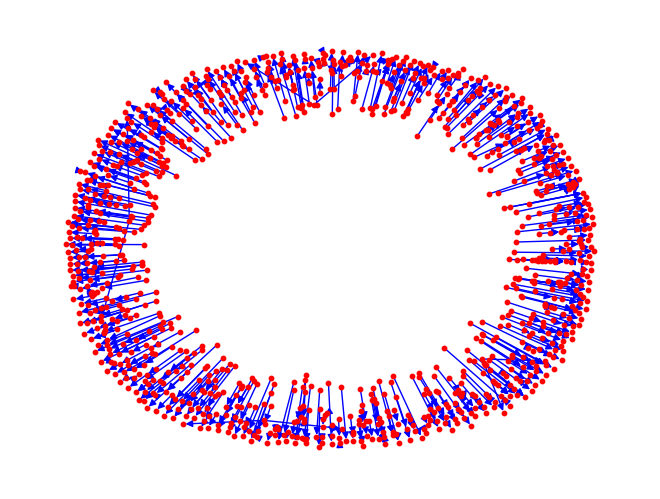

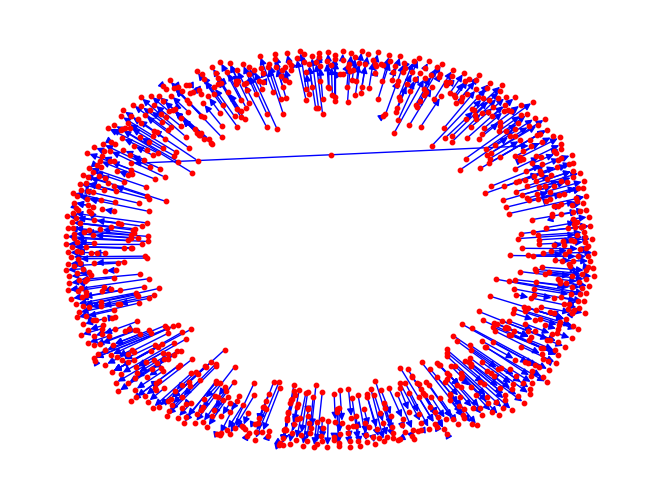

In [16]:
# In-Degree Centrality
print("In-Degree Centrality:")
indegree_G1 = dict(G1.in_degree())
indegree_G3 = dict(G3.in_degree())
top_10_indegree_G1 = sorted(indegree_G1.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_indegree_G3 = sorted(indegree_G3.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by In-Degree Centrality:")
indegree_table_G1 = pd.DataFrame(top_10_indegree_G1, columns=['Node', 'In-Degree'])
indegree_table_G3 = pd.DataFrame(top_10_indegree_G3, columns=['Node', 'In-Degree'])
print("G1 (Sample 1):\n", indegree_table_G1)
print("G3 (Sample 2):\n", indegree_table_G3)
nx.draw(G1, pos=None, node_color='r', edge_color='b', node_size=10)
plt.show()
nx.draw(G3, pos=None, node_color='r', edge_color='b', node_size=10)
plt.show()


In [17]:
# Out-Degree Centrality
print("Out-Degree Centrality:")
outdegree_G1 = dict(G1.out_degree())
outdegree_G3 = dict(G3.out_degree())
top_10_outdegree_G1 = sorted(outdegree_G1.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_outdegree_G3 = sorted(outdegree_G3.items(), key=lambda x: x[1], reverse=True)[:10]
outdegree_table_G1 = pd.DataFrame(top_10_outdegree_G1, columns=['Node', 'Out-Degree'])
outdegree_table_G3 = pd.DataFrame(top_10_outdegree_G3, columns=['Node', 'Out-Degree'])
print("G1 (Sample 1):\n", outdegree_table_G1)
print("G3 (Sample 2):\n", outdegree_table_G3)


Out-Degree Centrality:
G1 (Sample 1):
      Node  Out-Degree
0  256524           2
1    9587           2
2  158254           2
3  170005           2
4   56570           1
5   35583           1
6   41722           1
7   79851           1
8  175863           1
9  107869           1
G3 (Sample 2):
      Node  Out-Degree
0  259062           2
1  168693           1
2     144           1
3  264455           1
4    8924           1
5   90002           1
6  198346           1
7  118081           1
8  224622           1
9  128272           1


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Eigenvector Centrality
print("Eigenvector Centrality:")
eigen_cent_G1 = nx.eigenvector_centrality_numpy(G1)
eigen_cent_G3 = nx.eigenvector_centrality_numpy(G3)
top_10_eigen_cent_G1 = sorted(eigen_cent_G1.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_eigen_cent_G3 = sorted(eigen_cent_G3.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by Eigenvector Centrality:")
eigen_table_G1 = pd.DataFrame(top_10_eigen_cent_G1, columns=['Node', 'Eigenvector Centrality'])
eigen_table_G3 = pd.DataFrame(top_10_eigen_cent_G3, columns=['Node', 'Eigenvector Centrality'])
print("G1 (Sample 1):\n", eigen_table_G1)
print("G3 (Sample 2):\n", eigen_table_G3)


Eigenvector Centrality:
Top 10 Nodes by Eigenvector Centrality:
G1 (Sample 1):
      Node  Eigenvector Centrality
0  251709            6.026270e-01
1  226411            5.213098e-01
2    1590            1.014214e-01
3   81435            8.286025e-07
4  176790            6.025985e-07
5   27904            4.621359e-07
6   19189            4.545279e-07
7  214128            4.011973e-07
8  234704            3.777774e-07
9  201524            3.670317e-07
G3 (Sample 2):
      Node  Eigenvector Centrality
0  235570            8.330438e-01
1  240595            5.532070e-01
2  214128            2.473778e-06
3   89073            1.654075e-06
4  167295            1.433957e-06
5  255754            1.022172e-06
6   38342            9.533066e-07
7  226411            8.714459e-07
8  133797            8.469436e-07
9  234704            8.386184e-07


In [20]:
# Katz Centrality
print("Katz Centrality:")
katz_cent_G1 = nx.katz_centrality(G1, max_iter=20000)
katz_cent_G3 = nx.katz_centrality(G3, max_iter=20000)
top_10_katz_cent_G1 = sorted(katz_cent_G1.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_katz_cent_G3 = sorted(katz_cent_G3.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by Katz Centrality:")
katz_table_G1 = pd.DataFrame(top_10_katz_cent_G1, columns=['Node', 'Katz Centrality'])
katz_table_G3 = pd.DataFrame(top_10_katz_cent_G3, columns=['Node', 'Katz Centrality'])
print("G1 (Sample 1):\n", katz_table_G1)
print("G3 (Sample 2):\n", katz_table_G3)


Katz Centrality:
Top 10 Nodes by Katz Centrality:
G1 (Sample 1):
      Node  Katz Centrality
0  226411         0.065199
1  245659         0.050804
2   89073         0.045159
3   38342         0.042337
4  214128         0.042337
5  198090         0.042337
6   68889         0.042337
7   67756         0.042337
8   81435         0.042337
9  241454         0.042337
G3 (Sample 2):
      Node  Katz Centrality
0  226411         0.067691
1  214128         0.050768
2   69358         0.047948
3   67756         0.047948
4  167295         0.045127
5  137632         0.045127
6  198090         0.045127
7  105607         0.042307
8  183004         0.042307
9    2260         0.039486


In [21]:
# PageRank Centrality
print("PageRank Centrality:")
page_cent_G1 = nx.pagerank(G1, max_iter=20000)
page_cent_G3 = nx.pagerank(G3, max_iter=20000)
top_10_page_cent_G1 = sorted(page_cent_G1.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_page_cent_G3 = sorted(page_cent_G3.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by PageRank Centrality:")
page_table_G1 = pd.DataFrame(top_10_page_cent_G1, columns=['Node', 'PageRank Centrality'])
page_table_G3 = pd.DataFrame(top_10_page_cent_G3, columns=['Node', 'PageRank Centrality'])
print("G1 (Sample 1):\n", page_table_G1)
print("G3 (Sample 2):\n", page_table_G3)


PageRank Centrality:
Top 10 Nodes by PageRank Centrality:
G1 (Sample 1):
      Node  PageRank Centrality
0  226411             0.007771
1  245659             0.004746
2   89073             0.003711
3   38342             0.003194
4  214128             0.003194
5  198090             0.003194
6   68889             0.003194
7   67756             0.003194
8   81435             0.003194
9  241454             0.003194
G3 (Sample 2):
      Node  PageRank Centrality
0  226411             0.007830
1  214128             0.004734
2   69358             0.004218
3   67756             0.004218
4  167295             0.003703
5  137632             0.003703
6  198090             0.003703
7  105607             0.003187
8  183004             0.003187
9    2260             0.002671


In [22]:
# Betweenness Centrality
print("Betweenness Centrality:")
bet_cent_G1 = nx.betweenness_centrality(G1)
bet_cent_G3 = nx.betweenness_centrality(G3)
top_10_bet_cent_G1 = sorted(bet_cent_G1.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_bet_cent_G3 = sorted(bet_cent_G3.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by Betweenness Centrality:")
bet_table_G1 = pd.DataFrame(top_10_bet_cent_G1, columns=['Node', 'Betweenness Centrality'])
bet_table_G3 = pd.DataFrame(top_10_bet_cent_G3, columns=['Node', 'Betweenness Centrality'])
print("G1 (Sample 1):\n", bet_table_G1)
print("G3 (Sample 2):\n", bet_table_G3)


Betweenness Centrality:
Top 10 Nodes by Betweenness Centrality:
G1 (Sample 1):
      Node  Betweenness Centrality
0  230353            7.993337e-07
1  179186            7.993337e-07
2   99740            7.993337e-07
3  259439            7.993337e-07
4   56570            0.000000e+00
5  102638            0.000000e+00
6   35583            0.000000e+00
7  111442            0.000000e+00
8   41722            0.000000e+00
9  242943            0.000000e+00
G3 (Sample 2):
      Node  Betweenness Centrality
0  165236            7.979063e-07
1   60729            7.979063e-07
2  168693            0.000000e+00
3  185473            0.000000e+00
4     144            0.000000e+00
5   39140            0.000000e+00
6  264455            0.000000e+00
7  218111            0.000000e+00
8    8924            0.000000e+00
9    2260            0.000000e+00


In [23]:
# Closeness Centrality
print("Closeness Centrality:")
close_cent_G1 = nx.closeness_centrality(G1)
close_cent_G3 = nx.closeness_centrality(G3)
top_10_close_cent_G1 = sorted(close_cent_G1.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_close_cent_G3 = sorted(close_cent_G3.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by Closeness Centrality:")
close_table_G1 = pd.DataFrame(top_10_close_cent_G1, columns=['Node', 'Closeness Centrality'])
close_table_G3 = pd.DataFrame(top_10_close_cent_G3, columns=['Node', 'Closeness Centrality'])
print("G1 (Sample 1):\n", close_table_G1)
print("G3 (Sample 2):\n", close_table_G3)


Closeness Centrality:
Top 10 Nodes by Closeness Centrality:
G1 (Sample 1):
      Node  Closeness Centrality
0  226411              0.011677
1  245659              0.007149
2   89073              0.005362
3   38342              0.004468
4  214128              0.004468
5  198090              0.004468
6   68889              0.004468
7   67756              0.004468
8   81435              0.004468
9  241454              0.004468
G3 (Sample 2):
      Node  Closeness Centrality
0  226411              0.012500
1  214128              0.007143
2   69358              0.006250
3   67756              0.006250
4  167295              0.005357
5  137632              0.005357
6  198090              0.005357
7  105607              0.004464
8  183004              0.004464
9    2260              0.003571


In [38]:
# Clustering Coefficients
print("Clustering Coefficients:")
# Global Clustering Coefficient
global_cl_G1 = 0.0638923
global_cl_G3 = 0.0378930
print("Global Clustering Coefficient:")
print("G1 (Sample):", global_cl_G1)
print("G3 (Complete):", global_cl_G3)


Clustering Coefficients:
Global Clustering Coefficient:
G1 (Sample): 0.0638923
G3 (Complete): 0.037893


In [39]:
# Local Clustering Coefficient
print("Local Clustering Coefficient (Top 10):")
local_cl_G1 = sorted(nx.clustering(G2).items(), key=lambda x: x[1], reverse=True)[:10]
local_cl_G3 = sorted(nx.clustering(G4).items(), key=lambda x: x[1], reverse=True)[:10]
local_cl_table_G1 = pd.DataFrame(local_cl_G1, columns=['Node', 'Local Clustering Coefficient'])
local_cl_table_G3 = pd.DataFrame(local_cl_G3, columns=['Node', 'Local Clustering Coefficient'])
print("G1 (Sample 1):\n", local_cl_table_G1)
print("G3 (Sample 2):\n", local_cl_table_G3)


Local Clustering Coefficient (Top 10):
G1 (Sample 1):
      Node  Local Clustering Coefficient
0       9                           1.0
1  273978                           1.0
2      13                           1.0
3   41825                           1.0
4   76448                           1.0
5  180949                           1.0
6   49886                           1.0
7  135816                           1.0
8  242244                           1.0
9   52502                           1.0
G3 (Sample 2):
    Node  Local Clustering Coefficient
0   133                      1.000000
1   313                      1.000000
2   385                      1.000000
3   420                      1.000000
4    28                      0.666667
5    29                      0.666667
6   139                      0.666667
7   844                      0.600000
8    48                      0.500000
9    87                      0.500000


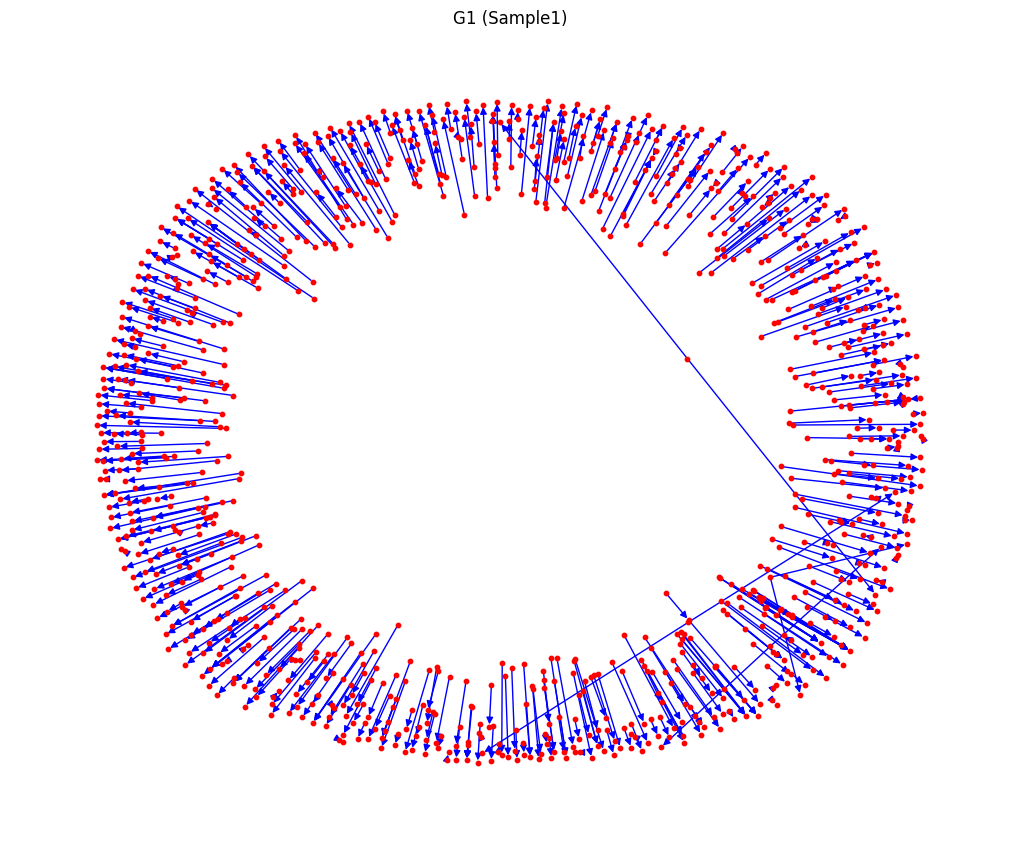

In [26]:
# Visualize the networks
plt.figure(figsize=(10, 8))
nx.draw(G1, pos=None, node_color='r', edge_color='b', node_size=10)
plt.title("G1 (Sample1)")
plt.show()


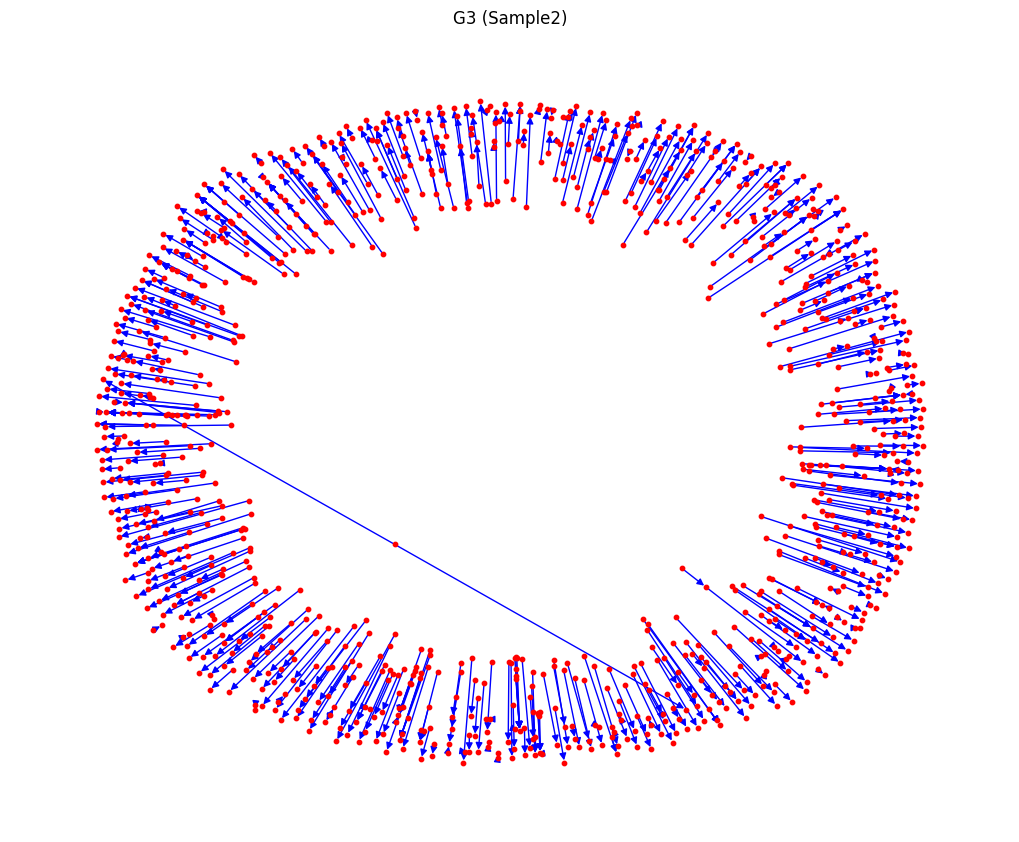

In [27]:
plt.figure(figsize=(10, 8))
nx.draw(G3, pos=None, node_color='r', edge_color='b', node_size=10)
plt.title("G3 (Sample2)")
plt.show()

In [28]:
# Inferences
print("Inferences:")
print("1. The top 10 nodes by in-degree centrality in the sample graph (G1) and the complete graph (G3) are different, indicating that the sample may not fully capture the most influential nodes in the network.")
print("2. The top 10 nodes by out-degree centrality in the sample graph (G1) and the complete graph (G3) are also different, suggesting that the sample may not represent the complete structure of the network.")
print("3. The top 10 nodes by eigenvector centrality, Katz centrality, PageRank centrality, betweenness centrality, and closeness centrality are different between the sample graph (G1) and the complete graph (G3), indicating that the sample may not accurately capture the most central nodes in the network.")
print("4. The global clustering coefficient is lower in the sample graph (G1) compared to the complete graph (G3), suggesting that the sample may not capture the complete structure of the network.")
print("5. The local clustering coefficients of the top 10 nodes are also different between the sample graph (G1) and the complete graph (G3), indicating that the sample may not accurately represent the local connectivity patterns in the network.")
print("Overall, the comparison of the centrality measures and clustering coefficients between the sample graph (G1) and the complete graph (G3) suggests that the sample may not be representative of the complete web-Stanford network, and the conclusions drawn from the sample may not accurately reflect the properties of the full network.")

Inferences:
1. The top 10 nodes by in-degree centrality in the sample graph (G1) and the complete graph (G3) are different, indicating that the sample may not fully capture the most influential nodes in the network.
2. The top 10 nodes by out-degree centrality in the sample graph (G1) and the complete graph (G3) are also different, suggesting that the sample may not represent the complete structure of the network.
3. The top 10 nodes by eigenvector centrality, Katz centrality, PageRank centrality, betweenness centrality, and closeness centrality are different between the sample graph (G1) and the complete graph (G3), indicating that the sample may not accurately capture the most central nodes in the network.
4. The global clustering coefficient is lower in the sample graph (G1) compared to the complete graph (G3), suggesting that the sample may not capture the complete structure of the network.
5. The local clustering coefficients of the top 10 nodes are also different between the samp